# LT 3

#### Group Members:
    
1)  
2)  
3)  
4)  
5)  

## Exploratory Data Analysis of Spotify track popularity in the Philippines

We will explore Spotify Philippines Top Hits data over the past year.

Comma-Separated Value (CSV) files containing weekly Top 200 tracks from the [Spotify Charts](https://spotifycharts.com/regional/ph/weekly/latest) site have been downloaded for you and could be found in the **spotify_data** subdirectory.

### 1) Setup

Let's get a list of these csv files:

In [220]:
import os
import re

In [221]:
file_dir = "./spotify_data"
file_list = os.listdir(file_dir)

#Filter to only .csv files
file_list = [f for f in filter(lambda x: re.search(r"\.csv$", x) , file_list)]

#Add directory prefix
file_list = [file_dir+"/"+f for f in file_list]
file_list

['./spotify_data/regional-ph-weekly-2018-08-03--2018-08-10.csv',
 './spotify_data/regional-ph-weekly-2018-08-17--2018-08-24.csv',
 './spotify_data/regional-ph-weekly-2018-09-21--2018-09-28.csv',
 './spotify_data/regional-ph-weekly-2019-02-01--2019-02-08.csv',
 './spotify_data/regional-ph-weekly-2019-05-24--2019-05-31.csv',
 './spotify_data/regional-ph-weekly-latest.csv',
 './spotify_data/regional-ph-weekly-2018-11-16--2018-11-23.csv',
 './spotify_data/regional-ph-weekly-2018-12-28--2019-01-04.csv',
 './spotify_data/regional-ph-weekly-2018-11-23--2018-11-30.csv',
 './spotify_data/regional-ph-weekly-2019-02-22--2019-03-01.csv',
 './spotify_data/regional-ph-weekly-2019-04-19--2019-04-26.csv',
 './spotify_data/regional-ph-weekly-2019-05-03--2019-05-10.csv',
 './spotify_data/regional-ph-weekly-2019-06-14--2019-06-21.csv',
 './spotify_data/regional-ph-weekly-2018-12-07--2018-12-14.csv',
 './spotify_data/regional-ph-weekly-2019-03-01--2019-03-08.csv',
 './spotify_data/regional-ph-weekly-2019-

We shall now load all csvs as one dataframe.

In [222]:
import pandas as pd

In [223]:
# exclude first row per file
def load_csv(file_name):
    df = pd.read_csv(file_name, skiprows=1)
    df["file_name"] = file_name
    return df
    
df = pd.concat(map(load_csv, file_list))

In [224]:
df.head()

,Position,Track Name,Artist,Streams,URL,file_name
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...


In [225]:
df.tail()

,Position,Track Name,Artist,Streams,URL,file_name
195,196,Rumors (with Sofia Carson),R3HAB,143865,https://open.spotify.com/track/4hIhoGN4UTZdNpH...,./spotify_data/regional-ph-weekly-2018-09-14--...
196,197,Never Be the Same,Camila Cabello,143720,https://open.spotify.com/track/4eWQlBRaTjPPUlz...,./spotify_data/regional-ph-weekly-2018-09-14--...
197,198,Meron Nang Iba,Silent Sanctuary,143468,https://open.spotify.com/track/4r7vGTk9HCW7YDo...,./spotify_data/regional-ph-weekly-2018-09-14--...
198,199,Sunday Morning,Maroon 5,143314,https://open.spotify.com/track/5qII2n90lVdPDcg...,./spotify_data/regional-ph-weekly-2018-09-14--...
199,200,What is Love?,TWICE,143116,https://open.spotify.com/track/5Ek40FyMPprcvty...,./spotify_data/regional-ph-weekly-2018-09-14--...


In [226]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name'], dtype='object')

Extract the beginning and ending days (yyyy-mm-dd) of the week as found in the file name.

In [227]:
# Get beginning and ending days (yyyy-mm-dd) of the week as found in the file name
extracted_df = df.loc[:,"file_name"].str.extract(r"([0-9]{4}\-[0-9]{2}\-[0-9]{2})\--([0-9]{4}\-[0-9]{2}\-[0-9]{2})")
extracted_df.columns = ["begin_date","end_date"]
extracted_df.head()

,begin_date,end_date
0,2018-08-03,2018-08-10
1,2018-08-03,2018-08-10
2,2018-08-03,2018-08-10
3,2018-08-03,2018-08-10
4,2018-08-03,2018-08-10


Add this new dataframe to the existing one.

In [228]:
#Add new columns to dataframe
df = pd.concat([df,extracted_df],axis=1)
df.head()

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10


Spotify tracks are assigned a track id, which can be seen embedded in the URL data above. Let's extract that into its own column called **"Track ID"** in the dataframe.

In [229]:
## write your code below.
track_ids = df.loc[:,"URL"].replace(r'^https://open\.spotify\.com\/track/','',regex=True)
track_ids[:20]

0     2G7V7zsVDxg1yRsu7Ew9RJ
1     7fa9MBXhVfQ8P8Df9OEbD8
2     4u8RkgV6P4TLi89SmlUtv8
3     4gB61mP4tNChn4LgfquMhi
4     3WUEs51GpcvlgU7lehLgLh
5     2BgD4nRyx9EZ5o8YEnjRSV
6     3VQb0rq27GPX92X53Ni1Lc
7     6SFStUDQZNaGPKWOx9ZiJB
8     5WvAo7DNuPRmk4APhdPzi8
9     2CWnuF7ht55Ajyeg4WPvWu
10    0ztDBQdQmdVZvorSmIjMih
11    3u1S1OmAUhx5DRlLrXqyp3
12    0d2iYfpKoM0QCKvcLCkBao
13    00mBzIWv5gHOYxwuEJXjOG
14    7gkWXbAxIYuvtOpcN3p9GJ
15    4Is1b37KJY9XVCgzp81FBW
16    3BPoSr2pO34Aan6alFfVto
17    4keoy2fqgwGnbWlm3ZVZFa
18    3nc420PXjTdBV5TN0gCFkS
19    10Igtw8bSDyyFs7KIsKngZ
Name: URL, dtype: object

In [230]:
df["Track ID"]=track_ids
df

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2G7V7zsVDxg1yRsu7Ew9RJ
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,7fa9MBXhVfQ8P8Df9OEbD8
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4u8RkgV6P4TLi89SmlUtv8
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4gB61mP4tNChn4LgfquMhi
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3WUEs51GpcvlgU7lehLgLh
5,6,Kung 'Di Rin Lang Ikaw,December Avenue,1089312,https://open.spotify.com/track/2BgD4nRyx9EZ5o8...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2BgD4nRyx9EZ5o8YEnjRSV
6,7,'Di Na Muli,Janine Teñoso,1043496,https://open.spotify.com/track/3VQb0rq27GPX92X...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3VQb0rq27GPX92X53Ni1Lc
7,8,2002,Anne-Marie,1042855,https://open.spotify.com/track/6SFStUDQZNaGPKW...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,6SFStUDQZNaGPKWOx9ZiJB
8,9,No Brainer,DJ Khaled,969262,https://open.spotify.com/track/5WvAo7DNuPRmk4A...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,5WvAo7DNuPRmk4APhdPzi8
9,10,DDU-DU DDU-DU - KR Ver.,BLACKPINK,903723,https://open.spotify.com/track/2CWnuF7ht55Ajye...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2CWnuF7ht55Ajyeg4WPvWu


### 2) Working with Master Data

We need more detailed information about the things of significance we are analyzing. In particular, we need to know more about the individual tracks (including audio features such as energy, danceability, or speechiness) and artists (including name and genres). 

Spotify provides an Application Programming Interface (API) to allow software developers to access these pieces of information through web services. 

We've previously used these APIs to extract master data based on the specific tracks found in the PH Top 200 weekly data loaded in the dataframe above. 

We shall now load tracks from JSON file **tracks.json**. The data was previously extracted via the Spotify Web API.

The keys and values are taken from the [Spotify Web API Documentation Page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>album</td>
      <td>a simplified <a href="/documentation/web-api/reference/object-model/#album-object-simplified">album object</a></td>
      <td>The album on which the track appears. The album object includes a link in <code class="highlighter-rouge">href</code> to full information about the album.</td>
    </tr>
    <tr>
      <td>artists</td>
      <td>an array of simplified <a href="/documentation/web-api/reference/object-model/#artist-object-simplified">artist objects</a></td>
      <td>The artists who performed the track. Each artist object includes a link in <code class="highlighter-rouge">href</code> to more detailed information about the artist.</td>
    </tr>
    <tr>
      <td>available_markets</td>
      <td>array of strings</td>
      <td>A list of the countries in which the track can be played, identified by their <a href="http://en.wikipedia.org/wiki/ISO_3166-1_alpha-2">ISO 3166-1 alpha-2</a> code.</td>
    </tr>
    <tr>
      <td>disc_number</td>
      <td>integer</td>
      <td>The disc number (usually <code class="highlighter-rouge">1</code> unless the album consists of more than one disc).</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>integer</td>
      <td>The track length in milliseconds.</td>
    </tr>
    <tr>
      <td>explicit</td>
      <td>Boolean</td>
      <td>Whether or not the track has explicit lyrics ( <code class="highlighter-rouge">true</code> = yes it does; <code class="highlighter-rouge">false</code> = no it does not OR unknown).</td>
    </tr>
    <tr>
      <td>external_ids</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-id-object">external ID object</a></td>
      <td>Known external IDs for the track.</td>
    </tr>
    <tr>
      <td>external_urls</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-url-object">external URL object</a></td>
      <td>Known external URLs for this track.</td>
    </tr>
    <tr>
      <td>href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify ID</a> for the track.</td>
    </tr>
    <tr>
      <td>is_playable</td>
      <td>boolean</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied. If <code class="highlighter-rouge">true</code> , the track is playable in the given market. Otherwise <code class="highlighter-rouge">false</code>.</td>
    </tr>
    <tr>
      <td>linked_from</td>
      <td>a <a href="/documentation/web-api/reference/object-model/#track-link">linked track object</a></td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, and the requested track has been replaced with different track. The track in the <code class="highlighter-rouge">linked_from</code> object contains information about the originally requested track.</td>
    </tr>
    <tr>
      <td>restrictions</td>
      <td>a restrictions object</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, the original track is not available in the given market, and Spotify did not have any tracks to relink it with. The track response will still contain metadata for the original track, and a restrictions object containing the reason why the track is not available: <code class="highlighter-rouge">"restrictions" : {"reason" : "market"}</code></td>
    </tr>
    <tr>
      <td>name</td>
      <td>string</td>
      <td>The name of the track.</td>
    </tr>
    <tr>
      <td>popularity</td>
      <td>integer</td>
      <td>The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.<br />The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.<br />Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.</td>
    </tr>
    <tr>
      <td>preview_url</td>
      <td>string</td>
      <td>A link to a 30 second preview (MP3 format) of the track. Can be <code class="highlighter-rouge">null</code></td>
    </tr>
    <tr>
      <td>track_number</td>
      <td>integer</td>
      <td>The number of the track. If an album has several discs, the track number is the number on the specified disc.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “track”.</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify URI</a> for the track.</td>
    </tr>
  </tbody>
</table>

In [231]:
import json

with open(file_dir+"/tracks.json","r") as tracks_file:
    tracks = json.load(tracks_file)

In [232]:
# display first 20 tracks only
tracks[:20]

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/1ATL5GLyefJaxhQzSPVrLX'},
   'href': 'https://api.spotify.com/v1/albums/1ATL5GLyefJaxhQzSPVrLX',
   'id': '1ATL5GLyefJaxhQzSPVrLX',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/542d705154be4049fc927050d006987e63739bbd',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/239ec906572231368d8ebd72614094bd3bd10b33',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/f12257240bbec6ddfa780253ac939e646eba2a36',
     'width': 64}],
   'name': 'Scorpion',
   'release_date': '2018-06-29',
   'release_date_precision': 

In [233]:
[t["id"] for t in tracks]

['2G7V7zsVDxg1yRsu7Ew9RJ',
 '7fa9MBXhVfQ8P8Df9OEbD8',
 '4u8RkgV6P4TLi89SmlUtv8',
 '7GbAp0HKPQW7WnFJAzMoRk',
 '3WUEs51GpcvlgU7lehLgLh',
 '2BgD4nRyx9EZ5o8YEnjRSV',
 '6p6DiqAPwMX7vdrSo30wgo',
 '2BgEsaKNfHUdlh97KmvFyo',
 '5WvAo7DNuPRmk4APhdPzi8',
 '7b8YOVV5quZcSKEijDgyWB',
 '0ztDBQdQmdVZvorSmIjMih',
 '3u1S1OmAUhx5DRlLrXqyp3',
 '0d2iYfpKoM0QCKvcLCkBao',
 '00mBzIWv5gHOYxwuEJXjOG',
 '5OCJzvD7sykQEKHH7qAC3C',
 '4Is1b37KJY9XVCgzp81FBW',
 '3BPoSr2pO34Aan6alFfVto',
 '4keoy2fqgwGnbWlm3ZVZFa',
 '3nc420PXjTdBV5TN0gCFkS',
 '10Igtw8bSDyyFs7KIsKngZ',
 '04ZTP5KsCypmtCmQg5tH9R',
 '6LJ1p1h5EcMK4VPeCLDSoF',
 '4hQ6UGyWQIGJmHSo0J88JW',
 '76cy1WJvNGJTj78UqeA5zr',
 '0WOvSEVpUGkNufX0w0M06F',
 '2RttW7RAu5nOAfq6YFvApB',
 '09IStsImFySgyp0pIQdqAc',
 '6NFKf8vBApSvtzkapYmnVR',
 '3T4UodGkfZObJ43RtA5KFU',
 '6kPJZM97LwdG9QIsT7khp6',
 '2iOnWSWcChoGmUufbrQ00e',
 '2qT1uLXPVPzGgFOx4jtEuo',
 '2iUXsYOEPhVqEBwsqP70rE',
 '4F1yvJfQ7gJkrcgFJQDjOr',
 '0kHyKhJMukHEPfeh8s7rdM',
 '6YEO7K4hwGKh7BmNxMMvkc',
 '2lYTJK94hb0fd1LQtb6Dhk',
 

#### 2a) Create a dictionary `tracks_dict` whose keys are the track ids (with attribute "id") and the values are dictionaries with the following attributes and values:

- "name" (Track Name)
- "duration_ms" (Duration in Milliseconds)
- "artist_id" (ID of the first artist in a list of artists)
- "artist_name" (Name of the first artist in a list of artists)

**(X points)**


In [234]:
tracks_dict = {}

## write code below
## -----------------
[tracks_dict.setdefault(t["original_id"],
                          {"name":t["name"],
                           "id":t["id"],
                           "duration_ms":t["duration_ms"],
                           "artist_id":t["artists"][0]["id"],
                           "artist_name":t["artists"][0]["name"],
                          }
                        ) 
                        for t in tracks]



[{'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 {'name': 'Thru These Tears',
  'id': '7GbAp0HKPQW7WnFJAzMoRk',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4nRyx9EZ5o8YEnjRSV',
  'duration_ms': 267759,
  'artist_id': '4qFxP3qN9GsnZDOkAE6x2m',
  'artist_name': 'December Avenue'},
 {'name': "'Di Na Muli",
  'id': '

In [235]:
# display tracks_dict to verify changes

## write code below
## ----------------
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 '4u8RkgV6P4TLi89SmlUtv8': {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 '4gB61mP4tNChn4LgfquMhi': {'name': 'Thru These Tears',
  'id': '7GbAp0HKPQW7WnFJAzMoRk',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 '3WUEs51GpcvlgU7lehLgLh': {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 '2BgD4nRyx9EZ5o8YEnjRSV': {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4n

---  


We will now load tracks from JSON file **audio_features.json**. The data was previously extracted via the Spotify Web API. The keys and values are taken from the description in the [Spotify Web API documentation page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). 

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>acousticness</td>
      <td>float</td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
    </tr>
    <tr>
      <td>analysis_url</td>
      <td>string</td>
      <td>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.</td>
    </tr>
    <tr>
      <td>danceability</td>
      <td>float</td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>int</td>
      <td>The duration of the track in milliseconds.</td>
    </tr>
    <tr>
      <td>energy</td>
      <td>float</td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The Spotify ID for the track.</td>
    </tr>
    <tr>
      <td>instrumentalness</td>
      <td>float</td>
      <td>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
    </tr>
    <tr>
      <td>key</td>
      <td>int</td>
      <td>The key the track is in. Integers map to pitches using standard <a href="https://en.wikipedia.org/wiki/Pitch_class">Pitch Class notation</a> . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.</td>
    </tr>
    <tr>
      <td>liveness</td>
      <td>float</td>
      <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
    </tr>
    <tr>
      <td>loudness</td>
      <td>float</td>
      <td>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.</td>
    </tr>
    <tr>
      <td>mode</td>
      <td>int</td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
      <td>speechiness</td>
      <td>float</td>
      <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
    </tr>
    <tr>
      <td>tempo</td>
      <td>float</td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td>
    </tr>
    <tr>
      <td>time_signature</td>
      <td>int</td>
      <td>An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
    </tr>
    <tr>
      <td>track_href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “audio_features”</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The Spotify URI for the track.</td>
    </tr>
    <tr>
      <td>valence</td>
      <td>float</td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
    </tr>
  </tbody>
</table>

In [236]:
import json

with open(file_dir+"/audio_features.json","r") as audio_features_file:
    audio_features = json.load(audio_features_file)

In [237]:
audio_features[:20]

[{'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 {'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode': 1,
  'speechiness': 0.0505,
  'acousticness': 0.568,
  'instrumentalness': 0,
  'liveness': 0.13,
  'valence': 0.448,
  'tempo': 124.959,
  'type': 'audio_features',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'uri': 'spotify:track:7fa9MBXhVfQ8P8Df9OEbD8',
  'track_href': 'https://api.spotify.com/v1/tracks/7fa9MBXhVfQ8P8Df9OE

#### 2b) Add audio features attributes to `tracks_dict`

Use the key 'original_id' as basis to update tracks_dict. Note that the `audio_features` dictionary entries also have the 'original_id' key so use that.

Hint: one way to do this is through the use of the `dict.update()` method

**(X points)**

In [238]:
### To Do: add attributes to the tracks dictionary

[tracks_dict[a["original_id"]].update(a) for a in audio_features];


In [239]:
# inspect tracks_dict to determine if the audio_features attributes have been carried over
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5',
  'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode':

In [241]:
len(tracks_dict)

794

We will now load tracks from JSON file **artists.json**. The data was previously extracted via the Spotify Web API.

In [242]:
import json

with open(file_dir+"/artists.json","r") as artists_file:
    artists = json.load(artists_file)

Let's take a look at the first 5 entries:

In [243]:
artists[:5]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ydoSd3N2mwgwBHtF6K7eX'},
  'followers': {'href': None, 'total': 1349550},
  'genres': ['australian pop', 'pop'],
  'href': 'https://api.spotify.com/v1/artists/6ydoSd3N2mwgwBHtF6K7eX',
  'id': '6ydoSd3N2mwgwBHtF6K7eX',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/1134c6cc39953feb998c83d5a7356ce6d1548a5c',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/87e98ba41d0405dd4a0a5aeca6f5f1ffea5a29bf',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/c016cd05bbb2e12a1e5d6d40e6e38f27363eb038',
    'width': 160}],
  'name': 'Calum Scott',
  'popularity': 78,
  'type': 'artist',
  'uri': 'spotify:artist:6ydoSd3N2mwgwBHtF6K7eX'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5qRSs6mvI17zrkJpOHkCoM'},
  'followers': {'href': None, 'total': 1907419},
  'genres': ['k-pop', 'k-pop boy group'],
  'href': 'https://api.spotify.com/v1/artists/5qRSs6mvI17z

#### 2c) Create a dictionary `artists_dict` whose keys are the artist ids (with attribute "id") and the values are dictionaries with the following attributes and values:

- "name" (Track Name)
- "genres" (Genres of the Artist)

**(X points)**

In [244]:
artists_dict = {}

[artists_dict.setdefault(a["id"],
                        {"name":a["name"],
                         "genres":a["genres"],
                        }) for a in artists]

[{'name': 'Calum Scott', 'genres': ['australian pop', 'pop']},
 {'name': 'iKON', 'genres': ['k-pop', 'k-pop boy group']},
 {'name': 'Janine Teñoso', 'genres': ['opm']},
 {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 {'name': 'Yeng Constantino', 'genres': ['classic opm', 'opm']},
 {'name': 'Sarah Geronimo', 'genres': ['classic opm', 'opm']},
 {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 {'name': 'Dominic Fike', 'genres': ['alternative pop rock']},
 {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie cafe pop',
   'indie electro-pop',
   'indie poptimism',
   'pop',
   'post-teen pop',
   'uk pop']},
 {'name': 'Eraserheads',
  'genres': ['classic opm',
   'opm',
   'pinoy indie',
   'pinoy reggae',
   'pinoy rock']},
 {'name': 'Tyler, The Creator', 'genres': ['hip h

Let's inspect the new dictionary:

In [245]:
artists_dict

{'6ydoSd3N2mwgwBHtF6K7eX': {'name': 'Calum Scott',
  'genres': ['australian pop', 'pop']},
 '5qRSs6mvI17zrkJpOHkCoM': {'name': 'iKON',
  'genres': ['k-pop', 'k-pop boy group']},
 '09Xydf4dlkr29dH99DmsvQ': {'name': 'Janine Teñoso', 'genres': ['opm']},
 '74KM79TiuVKeVCqs8QtB0B': {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 '0DnjaQqb436AH1idffI6CQ': {'name': 'Yeng Constantino',
  'genres': ['classic opm', 'opm']},
 '6aiCKnIN68hohzU3ZzNq48': {'name': 'Sarah Geronimo',
  'genres': ['classic opm', 'opm']},
 '6k0IBR0lU42s2GYpNX7kA9': {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 '6USv9qhCn6zfxlBQIYJ9qs': {'name': 'Dominic Fike',
  'genres': ['alternative pop rock']},
 '4BNWanhw4AjSXjBm9L1Jzy': {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 '5qa31A9HySw3T7MKWI9bGg': {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie 

In [246]:
len(artists_dict)

304

#### 2d) Add **artist_genre** attribute per track in the tracks_dict dictionary. 

We are assuming for now that tracks inherit directly the genre from the artist and that no tracks deviate from the artist's general genre.


**(X points)**

In [247]:
## Write code below
## ----------------

[value.setdefault("artist_genres",artists_dict[value["artist_id"]]["genres"]) for (key,value) in tracks_dict.items()]

[['canadian hip hop',
  'canadian pop',
  'hip hop',
  'pop rap',
  'rap',
  'toronto rap'],
 ['pop'],
 ['opm', 'pinoy indie', 'pinoy rock', 'pinoy trap'],
 ['la pop', 'pop'],
 ['opm', 'pinoy indie', 'pinoy rock'],
 ['opm', 'pinoy indie', 'pinoy pop punk'],
 ['opm'],
 ['dance pop', 'pop', 'post-teen pop', 'tropical house', 'uk pop'],
 ['hip hop',
  'miami hip hop',
  'pop',
  'pop rap',
  'rap',
  'southern hip hop',
  'trap music'],
 ['j-pop girl group', 'k-pop', 'k-pop girl group'],
 ['opm'],
 ['dance pop', 'edm', 'pop', 'tropical house', 'uk dance'],
 ['dance pop', 'edm', 'pop', 'post-teen pop', 'tropical house'],
 ['opm', 'pinoy indie', 'pinoy pop punk'],
 ['dance pop', 'pop', 'post-teen pop'],
 ['k-pop', 'k-pop girl group'],
 ['k-pop', 'k-pop girl group'],
 ['complextro',
  'dance pop',
  'edm',
  'electro house',
  'german techno',
  'pop',
  'post-teen pop',
  'tropical house'],
 ['big room', 'edm', 'pop', 'progressive house', 'tropical house'],
 ['pop rap', 'rap'],
 ['dance pop

#### 2e) Inspect **tracks_dict** and verify that the entries now have the 'artist_genres' property.

**(X points)**

In [248]:
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artist_genres': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',


In [250]:
len(tracks_dict)

794

### 3) More Data Transformation: Feature Extractions and Aggregations

We shall revisit our original dataframe and introduce additional columns to make our analysis and insights easier in the succeeding numbers.

Let's display the head of the dataframe `df` here again:

In [251]:
df.head()

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2G7V7zsVDxg1yRsu7Ew9RJ
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,7fa9MBXhVfQ8P8Df9OEbD8
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4u8RkgV6P4TLi89SmlUtv8
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4gB61mP4tNChn4LgfquMhi
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3WUEs51GpcvlgU7lehLgLh


In [321]:
type(df)

pandas.core.frame.DataFrame

In [324]:
len(pd.merge(df,df2,how="right",on="Track ID"))

335078

#### 3a) Add audio feature columns to the dataframe  

Let's add the following:
* Genres ("artist_genres" key will be mapped to "genres")
* Danceability ("danceability")
* Energy ("energy")
* Loudness ("loudness")
* Mode ("mode")
* Speechiness ("speechiness")
* Acousticness ("acousticness")
* Instrumentalness ("instrumentalness")
* Liveness ("liveness")
* Valence ("valence")
* Tempo ("tempo")

  
We will use the Pandas `df.apply(...)` with a lambda function method to perform this task. The code to do this has already been provided.

We will create a new dataframe from the original one and then assign to new columns in the original dataframe.

All that's left for you to do is to verify the changes in the original dataframe.

**(X points)**

In [350]:
df2 = df.from_dict(df.loc[:,"Track ID"].apply(lambda x: {"genres":tracks_dict[x]["artist_genres"],
                                      "danceability":tracks_dict[x]["danceability"],
                                      "energy":tracks_dict[x]["energy"],
                                      "loudness":tracks_dict[x]["loudness"],
                                      "mode":tracks_dict[x]["mode"],
                                      "speechiness":tracks_dict[x]["speechiness"],
                                      "acousticness":tracks_dict[x]["acousticness"],
                                      "instrumentalness":tracks_dict[x]["instrumentalness"],
                                      "liveness":tracks_dict[x]["liveness"],
                                      "valence":tracks_dict[x]["valence"],
                                      "tempo":tracks_dict[x]["tempo"],
                                     }).to_list())
df[df2.columns] = df2
df

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID,acousticness,danceability,energy,genres,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2G7V7zsVDxg1yRsu7Ew9RJ,0.058900,0.835,0.626,"[canadian hip hop, canadian pop, hip hop, pop ...",0.000060,0.3960,-5.833,1,0.1250,91.030,0.350
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,7fa9MBXhVfQ8P8Df9OEbD8,0.568000,0.851,0.541,[pop],0.000000,0.1300,-6.825,1,0.0505,124.959,0.448
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4u8RkgV6P4TLi89SmlUtv8,0.176000,0.705,0.401,"[opm, pinoy indie, pinoy rock, pinoy trap]",0.000009,0.0735,-8.900,1,0.0376,140.031,0.481
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4gB61mP4tNChn4LgfquMhi,0.154000,0.711,0.517,"[la pop, pop]",0.000000,0.1490,-7.695,1,0.0391,119.945,0.294
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3WUEs51GpcvlgU7lehLgLh,0.776000,0.491,0.314,"[opm, pinoy indie, pinoy rock]",0.000005,0.1520,-8.580,1,0.0301,126.921,0.295
5,6,Kung 'Di Rin Lang Ikaw,December Avenue,1089312,https://open.spotify.com/track/2BgD4nRyx9EZ5o8...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2BgD4nRyx9EZ5o8YEnjRSV,0.161000,0.502,0.482,"[opm, pinoy indie, pinoy pop punk]",0.000000,0.1870,-4.736,1,0.0288,133.894,0.132
6,7,'Di Na Muli,Janine Teñoso,1043496,https://open.spotify.com/track/3VQb0rq27GPX92X...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3VQb0rq27GPX92X53Ni1Lc,0.192000,0.413,0.561,[opm],0.000000,0.0914,-3.092,1,0.0517,88.690,0.352
7,8,2002,Anne-Marie,1042855,https://open.spotify.com/track/6SFStUDQZNaGPKW...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,6SFStUDQZNaGPKWOx9ZiJB,0.037200,0.697,0.683,"[dance pop, pop, post-teen pop, tropical house...",0.000000,0.1370,-2.881,0,0.1170,96.133,0.603
8,9,No Brainer,DJ Khaled,969262,https://open.spotify.com/track/5WvAo7DNuPRmk4A...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,5WvAo7DNuPRmk4APhdPzi8,0.073300,0.552,0.760,"[hip hop, miami hip hop, pop, pop rap, rap, so...",0.000000,0.0865,-4.706,1,0.3420,135.702,0.639
9,10,DDU-DU DDU-DU - KR Ver.,BLACKPINK,903723,https://open.spotify.com/track/2CWnuF7ht55Ajye...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2CWnuF7ht55Ajyeg4WPvWu,0.032200,0.665,0.860,"[j-pop girl group, k-pop, k-pop girl group]",0.000000,0.2810,-3.921,0,0.0761,139.973,0.372


In [352]:
## write code below )to check the structure and length of the altered dataframe
## ----------------------------------------------------------------------------




In [351]:
len(df)

10600

#### 3b) Extract genres
  
Prepare a tally board named `genre_tally_dict` that counts the number of streams of a particular genre across all tracks in the dataframe. Note that the **"genres"** column contains lists, so you may have to go through the elements of each list.

Make a copy of the dataframe.
  

**(X points)**

In [526]:
genre_tally_dict = {}

def increment_tally(genre, streams):
    genre_tally_dict.setdefault(genre, 0)
    genre_tally_dict[genre] += streams

## write code below
## ----------------

df.loc[:,["genres","Streams"]].apply(lambda x: [increment_tally(g,x[1]) for g in x[0]],axis=1);


In [527]:
genre_df = pd.DataFrame([(k,v) for k,v in genre_tally_dict.items()],columns=["genre","count"]).copy()
genre_df

,genre,count
0,canadian hip hop,127751368
1,canadian pop,127751368
2,hip hop,206900735
3,pop rap,393115835
4,rap,391491028
5,toronto rap,127751368
6,pop,1921967393
7,opm,1295018390
8,pinoy indie,749352719
9,pinoy rock,614545741


#### 3c) Sort genre dataframe by count in descending order

Make sure that changes are made in-place and that you reset the index.

**(X points)**

In [528]:
genre_df.sort_values(by="count",ascending=False,inplace=True)
genre_df.reset_index(inplace=True)

#### 3d) Extract month and year

Add a column `chart_month` which contains the value yyyy-mm from end_date.

**(X Points)**

In [529]:
## write code below
## -------------------

df["chart_month"] = df.loc[:,"end_date"].str.extract(r"^([0-9]{4}\-[0-9]{2})")
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'acousticness', 'danceability',
       'energy', 'genres', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'chart_month'],
      dtype='object')

#### 3e) Create a new dataframe containing an aggregate of Total Streams from Artists by chart month

Make a copy of the dataframe.

**(X points)**

In [530]:
artist_streams_df = df.loc[:,["Artist","chart_month","Streams"]].groupby(["Artist","chart_month"])["Streams"].sum().reset_index(name="Streams").copy()
artist_streams_df.sort_values(by=["chart_month","Streams"], ascending=False, inplace=True)
artist_streams_df.reset_index(inplace=True)

#### 3f) Mean Audio Features per Artist

Prepare a new dataframe `mean_audio_features_df` that has the following columns:

- Artists
- danceability
- liveness
- instrumentalness
- loudness
- speechiness
- valence
- mode,

where the features are the average or mean values per Artist. Sort this new dataframe by danceability in descending order (i.e. `ascending=False`).

**(X points)**

In [543]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'acousticness', 'danceability',
       'energy', 'genres', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'chart_month'],
      dtype='object')

In [616]:
mean_audio_features_df = df.loc[:,["Artist","danceability","liveness","instrumentalness","loudness","speechiness","valence","mode"]].groupby(["Artist"]).mean().copy()
mean_audio_features_df.sort_values(by="danceability",ascending=False,inplace=True)
mean_audio_features_df.reset_index(inplace=True)
mean_audio_features_df.head()

,Artist,danceability,liveness,instrumentalness,loudness,speechiness,valence,mode
0,Usher,0.853,0.1250,0.003170,-9.625,0.0371,0.511,1.0
1,Kodak Black,0.853,0.0944,0.000000,-4.961,0.0406,0.860,1.0
2,Liam Payne,0.853,0.0944,0.000000,-4.961,0.0406,0.860,1.0
3,Normani,0.828,0.1500,0.000037,-6.685,0.0327,0.872,1.0
4,Star Music All Star Cast,0.806,0.2940,0.000000,-4.623,0.0307,0.746,1.0


#### 3g) Cumulative Streams Per Artist

Prepare a new dataframe `total_streams_per_artist_df` that sums all streams per artist across the one year period.

**(X points)**

In [721]:
## write code below
## -------------------------
total_streams_per_artist_df = df.loc[:,["Artist","Streams"]].groupby("Artist").sum().copy().reset_index()
total_streams_per_artist_df.sort_values(by="Streams",ascending=False, inplace=True)


,Artist,Streams
80,December Avenue,230648949
164,LANY,195041003
40,Ben&Ben,140391135
25,Ariana Grande,130212637
278,This Band,97749381
208,Moira Dela Torre,94930807
110,I Belong to the Zoo,90818854
32,BLACKPINK,87164814
88,Ed Sheeran,75345317
228,Post Malone,74120346


In [722]:
## Check your answers below
total_streams_per_artist_df.head(10)

,Artist,Streams
80,December Avenue,230648949
164,LANY,195041003
40,Ben&Ben,140391135
25,Ariana Grande,130212637
278,This Band,97749381
208,Moira Dela Torre,94930807
110,I Belong to the Zoo,90818854
32,BLACKPINK,87164814
88,Ed Sheeran,75345317
228,Post Malone,74120346


### 4) Insights and Visualization

#### 4a) What are the 20 most popular genres in the Philippines?

Draw a horizontal bar graph showing the genre on the y axis and the count as the width.

Invert the y axis (through the `invert_yaxis()` method.

Your resulting plot should look something like this.

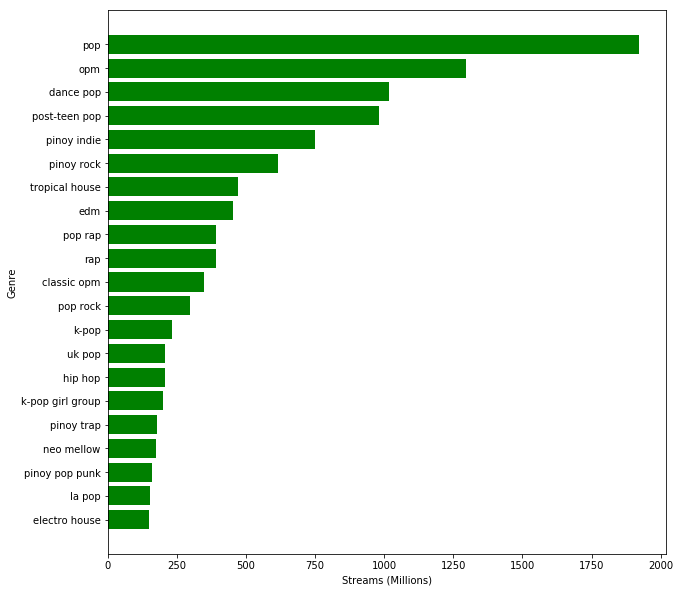

**(X points)**

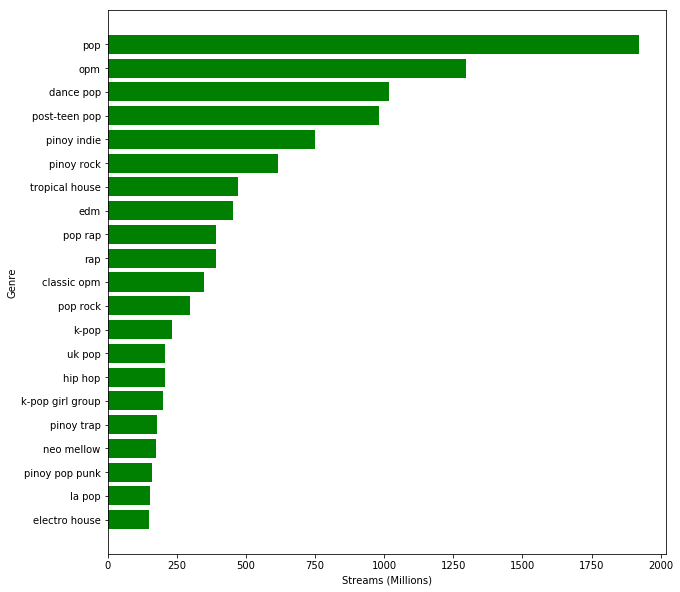

In [671]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write your code below

ax.barh(width=genre_df.loc[:20,"count"]/1000000, y=genre_df.loc[:20,"genre"], color="Green")
ax.invert_yaxis()
ax.set_xlabel("Streams (Millions)")
ax.set_ylabel("Genre")
plt.show()

In [566]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'acousticness', 'danceability',
       'energy', 'genres', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'chart_month'],
      dtype='object')

#### 4b) Who are the most popular Artists in the Philippines (as measured by stream count) in June 2019?

Plot a **horizontal bar**.

The resulting plot should look something like this:

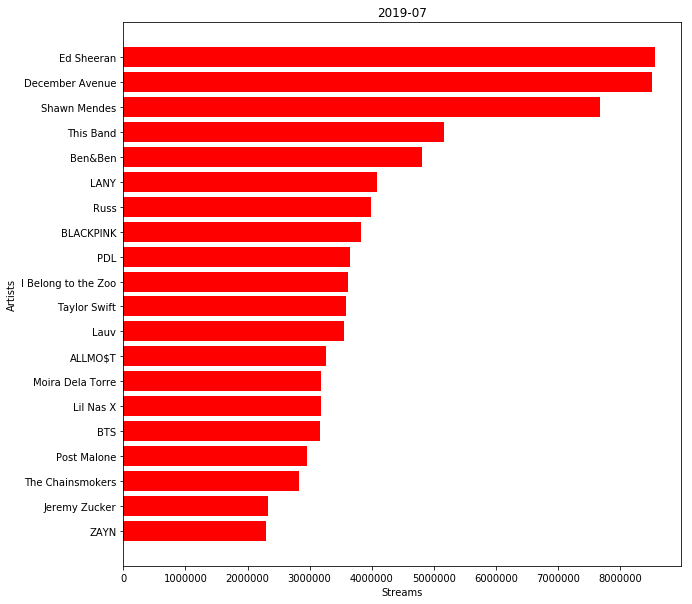

**(X points)**

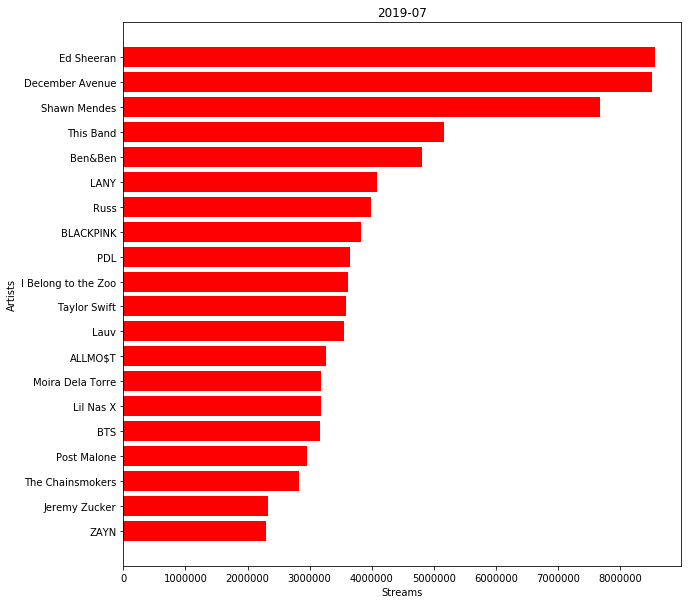

In [534]:
import matplotlib.pyplot as plt

chart_month = "2019-07"

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write code below
## ------------------------

condition = (artist_streams_df.loc[:,"chart_month"]==chart_month)

ax.set_title(chart_month)
ax.barh(width=artist_streams_df.loc[condition,"Streams"][0:20], y=artist_streams_df.loc[condition,"Artist"][0:20], color="Red")
ax.invert_yaxis()
ax.set_xlabel("Streams")
ax.set_ylabel("Artists")
plt.show()

In [636]:
mean_audio_features_df.columns.drop("Artist")

Index(['danceability', 'liveness', 'instrumentalness', 'loudness',
       'speechiness', 'valence', 'mode'],
      dtype='object')

#### 4c) What are the average features of the top 10 artists by total stream count?

There are no plots nor graphs in this number. Only display the contents of the resulting dataframe.

Revisit the `mean_audio_features_df` dataframe.  

Only include the top 10 artists by total stream count.  

Hint: Use the `total_streams_per_artist_df` dataframe as basis for your filtering.

Hint: Consider using the `DataFrame.isin(...)` method. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html



**(X points)**

In [719]:
## write your code below
## ----------------------

mean_audio_features_df.loc[mean_audio_features_df.loc[:,"Artist"].isin(total_streams_per_artist_df.loc[:,"Artist"].head(10)),:]





,Artist,danceability,liveness,instrumentalness,loudness,speechiness,valence,mode
48,I Belong to the Zoo,0.644144,0.137991,0.000741,-6.630278,0.063766,0.407811,0.811111
83,This Band,0.629253,0.159965,0.000426,-5.812404,0.102412,0.443444,0.737374
85,December Avenue,0.628997,0.137791,0.001221,-6.678929,0.063375,0.409468,0.781538
96,Ed Sheeran,0.625694,0.153446,0.000421,-7.570371,0.056863,0.406998,0.838710
112,Moira Dela Torre,0.622172,0.145804,0.001324,-7.022598,0.063144,0.409754,0.793103
113,LANY,0.622152,0.134362,0.000711,-7.016731,0.068505,0.412306,0.778742
155,BLACKPINK,0.610681,0.139826,0.000897,-7.183369,0.061725,0.402831,0.819231
166,Ariana Grande,0.607673,0.151281,0.000641,-7.143418,0.070895,0.392934,0.787072
168,Post Malone,0.607415,0.134897,0.000432,-7.277227,0.068336,0.407632,0.772727
183,Ben&Ben,0.600874,0.133243,0.000565,-6.575432,0.084477,0.412601,0.752427


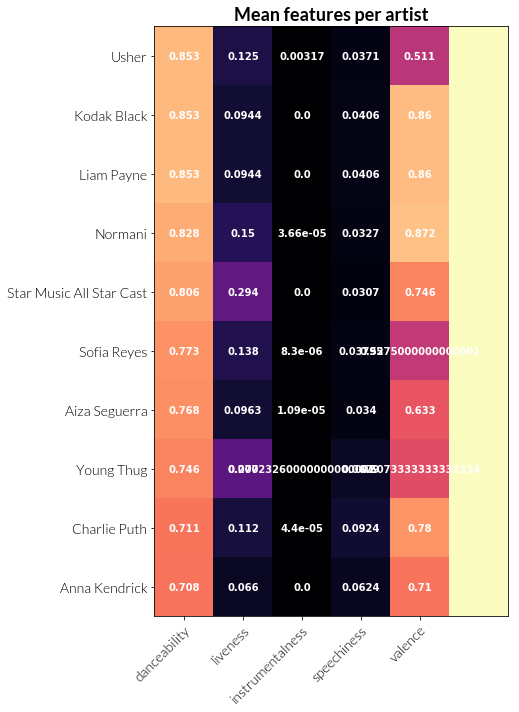

In [726]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


features = mean_audio_features_df.columns.drop(["Artist","loudness","mode"])
top_artists = mean_audio_features_df.loc[0:9, "Artist"]
feature_array = mean_audio_features_df.head(10).drop(["Artist","loudness"],axis=1).to_numpy()


fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
im = ax.imshow(feature_array, cmap="magma")

title_font = {"fontweight":"bold", "fontfamily":"Lato", "fontsize":18}
label_font = {"fontfamily":"Lato", "fontsize":14}

# We want to show all ticks...
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(top_artists)))
# ... and label them with the respective list entries
ax.set_xticklabels(features, **label_font)
ax.set_yticklabels(top_artists, **label_font)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(top_artists)):
    for j in range(len(features)):
        text = ax.text(j, i, feature_array[i, j],
                       ha="center", va="center", color="White", fontweight="bold")

ax.set_title("Mean features per artist", **title_font)
fig.tight_layout()

#### 4d) Which are the 10 most danceable artists who have made it in the Top 200 charts?

Plot a horizontal bar graph of these top 10 Danceable Artists.

**(X points)**

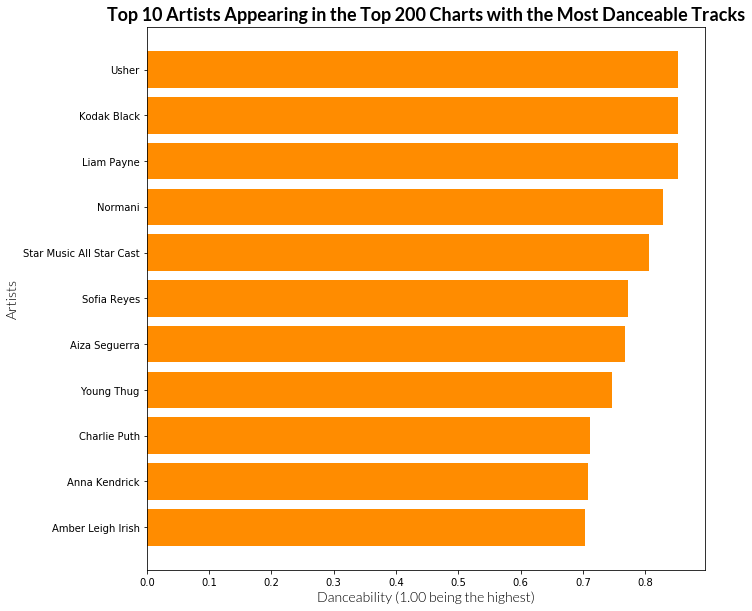

In [630]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

title_font = {"fontweight":"bold", "fontfamily":"Lato", "fontsize":18}
label_font = {"fontfamily":"Lato", "fontsize":14}

ax.barh(width=mean_audio_features_df.loc[0:10,"danceability"], y=mean_audio_features_df.loc[0:10,"Artist"], color="DarkOrange")
ax.invert_yaxis()
ax.set_title("Top 10 Artists Appearing in the Top 200 Charts with the Most Danceable Tracks", **title_font)
ax.set_xlabel("Danceability (1.00 being the highest)", **label_font)
ax.set_ylabel("Artists", **label_font)
plt.show()

#### 4d) Staying power

Which artists stayed for 52 weeks in the charts? 

Prepare a new dataframe `artist_stay_df` that shows the number of periods (weeks) each Artist was included in the Top 200 Charts.

**Hint:** It's possible that one artist can have several tracks in the Top 200 all at at the same time, but we need to count this stay only once. Use `DataFrame.drop_duplicates()` to get unique rows.

Also try to sort by "weeks" in descending order.

**(X points)**

In [752]:
## write code below
## ---------------------
artist_stay_df = df.loc[:,["Artist","end_date"]].drop_duplicates().groupby("Artist").count().reset_index().copy()
artist_stay_df.rename(columns={'end_date':'weeks'},inplace=True)
artist_stay_df.sort_values("weeks",ascending=False,inplace=True)
artist_stay_df.loc[artist_stay_df.loc[:,"weeks"]==52,:]

,Artist,weeks
40,Ben&Ben,52
57,Callalily,52
105,H.E.R.,52
257,Silent Sanctuary,52
37,Bazzi,52
80,December Avenue,52
253,Shanti Dope,52
252,Selena Gomez,52
164,LANY,52
249,Sam Smith,52


#### Extras

In [840]:
artists_merged_df = pd.merge(mean_audio_features_df,total_streams_per_artist_df,on="Artist").copy()
artists_merged_df.sort_values(by="Streams",ascending=False,inplace=True)
artists_merged_df.reset_index(inplace=True)
artists_merged_df.drop(columns=["index"],inplace=True)
artists_merged_df.head()

,Artist,danceability,liveness,instrumentalness,loudness,speechiness,valence,mode,Streams
0,December Avenue,0.628997,0.137791,0.001221,-6.678929,0.063375,0.409468,0.781538,230648949
1,LANY,0.622152,0.134362,0.000711,-7.016731,0.068505,0.412306,0.778742,195041003
2,Ben&Ben,0.600874,0.133243,0.000565,-6.575432,0.084477,0.412601,0.752427,140391135
3,Ariana Grande,0.607673,0.151281,0.000641,-7.143418,0.070895,0.392934,0.787072,130212637
4,This Band,0.629253,0.159965,0.000426,-5.812404,0.102412,0.443444,0.737374,97749381


Text(0, 0.5, 'liveness')

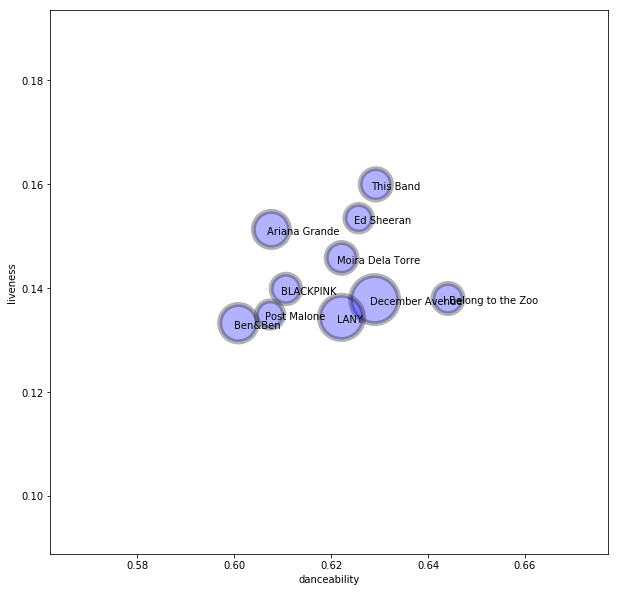

In [854]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write code below
## ------------------------

condition = (artist_streams_df.loc[:,"chart_month"]==chart_month)
feature_x="danceability"
feature_y="liveness"

ax.scatter(artists_merged_df.head(10).loc[:,feature_x],
           artists_merged_df.head(10).loc[:,feature_y],
           s=artists_merged_df.head(10).loc[:,"Streams"]/100000,
           alpha="0.3",
           edgecolor="Black",
           linewidth=5,
           color="Blue"
          )

offset=-0.001
artists_merged_df.head(10).apply(lambda x:ax.annotate(x[0],xy=(x[1]+offset,x[2]+offset)), axis=1)
#artists_merged_df.head(10).apply(lambda x:print(x[0],x[1],x[2]), axis=1)
#for i, a in enumerate(artists_merged_df.head(10)):
#    corr = -0.05 # adds a little correction to put annotation in marker's centrum
#    print(a)
    #x=a[feature_x]
    #y=a[feature_y]
    #ax.annotate(artists_merged_df.head(10).loc[:,"Artist"],  xy=(x + corr, y + corr))

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)